In [1]:
#Import some libraries

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from currency_converter import CurrencyConverter
import datetime
from wordcloud import WordCloud, STOPWORDS 
import textwrap
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Load data from a CSV file into pandas DataFrame
data_imdb_movies = pd.read_csv('data/IMDb movies.csv')
data_imdb_names = pd.read_csv('data/IMDb names.csv')
data_imdb_title_principals = pd.read_csv('data/IMDb title_principals.csv')

D:\application\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
imdb_movies = data_imdb_movies.copy()
imdb_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [4]:
imdb_names = data_imdb_names.copy()
imdb_names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [5]:
imdb_title_principals = data_imdb_title_principals.copy()
imdb_title_principals.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


In [6]:
# Informations on each data

print(imdb_movies.info())
print('\n')
print(imdb_names.info())
print('\n')
print(imdb_title_principals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
imdb_title_id            85855 non-null object
title                    85855 non-null object
original_title           85855 non-null object
year                     85855 non-null object
date_published           85855 non-null object
genre                    85855 non-null object
duration                 85855 non-null int64
country                  85791 non-null object
language                 85022 non-null object
director                 85768 non-null object
writer                   84283 non-null object
production_company       81400 non-null object
actors                   85786 non-null object
description              83740 non-null object
avg_vote                 85855 non-null float64
votes                    85855 non-null int64
budget                   23710 non-null object
usa_gross_income         15326 non-null object
worlwide_gross_income    31016 non-null object

# Data Preprocessing & Exploratory Data Analysis

In [7]:
# Filtering data (only USA or Hollywood Movies)
imdb_movies['country'].fillna('', inplace = True)
imdb_movies = imdb_movies[imdb_movies['country'].str.contains('USA')]

In [8]:
# Merge name to title principals
imdb_title_principals = pd.merge(imdb_title_principals, imdb_names[['imdb_name_id', 'name']], 
                                 left_on = ['imdb_name_id'], right_on = ['imdb_name_id']) 
# Ordering columns
imdb_title_principals = imdb_title_principals[['imdb_title_id', 'ordering', 'imdb_name_id', 'name', 'category', 'job', 'characters']]
imdb_title_principals.head()

,imdb_title_id,ordering,imdb_name_id,name,category,job,characters
0,tt0000009,1,nm0063086,Blanche Bayliss,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,William Courtenay,actor,NaN,"[""Mr. Hamilton""]"
2,tt0020403,2,nm0183823,William Courtenay,actor,NaN,"[""The Minister - Guillotine Sequence""]"
3,tt0000009,3,nm1309758,Chauncey Depew,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
4,tt0000009,4,nm0085156,Alexander Black,director,NaN,NaN


In [9]:
# Create new column "cinematographer" into imdb_movies data
cinematographer_name = imdb_title_principals[imdb_title_principals['category']=='cinematographer'].reset_index()
cinematographer_name.rename(columns={'name' : 'cinematographer'}, inplace = True)
imdb_movies = pd.merge(imdb_movies, cinematographer_name[['imdb_title_id', 'cinematographer']],
                       left_on = 'imdb_title_id', right_on = 'imdb_title_id', how = 'left')

# Group/join cinematographer names with same imdb_title_id to avoid duplicated data (from merging imdb_movies and cinematographer_name)
duplicated_data = imdb_movies[imdb_movies['imdb_title_id'].duplicated(keep = False)]
multiple_names_cinematographer = duplicated_data.groupby('imdb_title_id')['cinematographer'].apply(', '.join).reset_index()
duplicated_data.drop(['cinematographer'], axis = 1, inplace = True)
duplicated_data.drop_duplicates(subset=['imdb_title_id'], inplace = True)
data_multiple_names = pd.merge(duplicated_data, multiple_names_cinematographer[['imdb_title_id', 'cinematographer']], 
                               left_on = 'imdb_title_id', right_on = 'imdb_title_id')
data_multiple_names[['imdb_title_id', 'cinematographer']].head()

,imdb_title_id,cinematographer
0,tt0004134,"Dal Clawson, George W. Hill"
1,tt0005149,"Robert Newhard, Joseph H. August"
2,tt0007340,"King D. Gray, Stephen S. Norton"
3,tt0007755,"John W. Brown, Ben F. Reynolds"
4,tt0008196,"Walter Stradling, Charles Rosher"


In [10]:
# Drop and replace duplicate data (because names of cinematographer) with data which have multiple names of cinematographer
imdb_movies.drop_duplicates(subset=['imdb_title_id'], keep = False, inplace = True)
imdb_movies = pd.concat((imdb_movies, data_multiple_names), sort = False).sort_values('imdb_title_id')

# Reorder column cinematographer
cols = imdb_movies.columns.tolist()
cols = cols[0:13] + cols[-1:] + cols [13:-1]
imdb_movies = imdb_movies[cols]
imdb_movies[['imdb_title_id', 'original_title', 'cinematographer']].head()

,imdb_title_id,original_title,cinematographer
0,tt0000009,Miss Jerry,NaN
1,tt0002101,Cleopatra,NaN
2,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",George K. Hollister
3,tt0002461,Richard III,NaN
4,tt0003167,"Home, Sweet Home",G.W. Bitzer


In [11]:
# Create budget_currency column and formatting budget column into numeric values for converting to usd
imdb_movies['budget_currency'] = imdb_movies['budget'].str.split(' ', expand = True)[0]
imdb_movies['budget_currency'] = imdb_movies['budget_currency'].str.replace('$', 'USD')
imdb_movies['budget'] = imdb_movies['budget'].str.split(' ', expand = True)[1]
imdb_movies['budget'] = pd.to_numeric(imdb_movies['budget'], errors='coerce')

# Create worlwide_gross_income_currency column and formatting worlwide_gross_income column into numeric values for converting to usd
imdb_movies['worlwide_gross_income_currency'] = imdb_movies['worlwide_gross_income'].str.split(' ', expand = True)[0]
imdb_movies['worlwide_gross_income_currency'] = imdb_movies['worlwide_gross_income_currency'].str.replace('$', 'USD')
imdb_movies['worlwide_gross_income'] = imdb_movies['worlwide_gross_income'].str.split(' ', expand = True)[1]
imdb_movies['worlwide_gross_income'] = pd.to_numeric(imdb_movies['worlwide_gross_income'], errors='coerce')

# Create usa_gross_income_currency column and formatting usa_gross_income column into numeric values for converting to usd
imdb_movies['usa_gross_income_currency'] = imdb_movies['usa_gross_income'].str.split(' ', expand = True)[0]
imdb_movies['usa_gross_income_currency'] = imdb_movies['usa_gross_income_currency'].str.replace('$', 'USD')
imdb_movies['usa_gross_income'] = imdb_movies['usa_gross_income'].str.split(' ', expand = True)[1]
imdb_movies['usa_gross_income'] = pd.to_numeric(imdb_movies['usa_gross_income'], errors='coerce')


In [12]:
# Convert currencies into USD

c = CurrencyConverter()
for i in range(imdb_movies.shape[0]):
    # budget column
    if (imdb_movies['budget_currency'].iloc[i] in c.currencies):
        imdb_movies['budget'].iloc[i] = c.convert(imdb_movies['budget'].iloc[i], imdb_movies['budget_currency'].iloc[i], 'USD')
    else :
        imdb_movies['budget'].iloc[i] = np.nan
   
    # worlwide_gross_income column   
    if (imdb_movies['worlwide_gross_income_currency'].iloc[i] in c.currencies):
        imdb_movies['worlwide_gross_income'].iloc[i] = c.convert(imdb_movies['worlwide_gross_income'].iloc[i], 
                                                            imdb_movies['worlwide_gross_income_currency'].iloc[i], 'USD', )
    else :
        imdb_movies['worlwide_gross_income'].iloc[i] = np.nan
    
    # usa_gross_income column   
    if (imdb_movies['usa_gross_income_currency'].iloc[i] in c.currencies):
        imdb_movies['usa_gross_income'].iloc[i] = c.convert(imdb_movies['usa_gross_income'].iloc[i], 
                                                       imdb_movies['usa_gross_income_currency'].iloc[i], 'USD', 
                                                       )
    else :
        imdb_movies['usa_gross_income'].iloc[i] = np.nan
imdb_movies[['imdb_title_id', 'original_title', 'budget', 'worlwide_gross_income', 'usa_gross_income']].head()

,imdb_title_id,original_title,budget,worlwide_gross_income,usa_gross_income
0,tt0000009,Miss Jerry,NaN,NaN,NaN
1,tt0002101,Cleopatra,45000.0,NaN,NaN
2,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",NaN,NaN,NaN
3,tt0002461,Richard III,30000.0,NaN,NaN
4,tt0003167,"Home, Sweet Home",NaN,NaN,NaN


In [13]:
# Data preprocessed
pd.set_option('display.max_columns', None)
imdb_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,cinematographer,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_currency,worlwide_gross_income_currency,usa_gross_income_currency
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",NaN,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",NaN,The fabled queen of Egypt's affair with Roman ...,5.2,446,45000.0,NaN,NaN,NaN,25.0,3.0,USD,NaN,NaN
2,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",George K. Hollister,"An account of the life of Jesus Christ, based ...",5.7,484,NaN,NaN,NaN,NaN,13.0,5.0,NaN,NaN,NaN
3,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",Le Film d'Art,"Robert Gemp, Frederick Warde, Albert Gardner, ...",NaN,Richard of Gloucester uses manipulation and mu...,5.5,225,30000.0,NaN,NaN,NaN,8.0,1.0,USD,NaN,NaN
4,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,"D.W. Griffith, H.E. Aitken",Majestic Motion Picture Company,"Henry B. Walthall, Josephine Crowell, Lillian ...",G.W. Bitzer,John Howard Payne at his most miserable point ...,5.8,187,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN


## Analysis Numeric and Categorical Data

### Analysis Numeric Data

In [14]:
num_data = ['duration', 'avg_vote', 'votes', 'budget', 'usa_gross_income', 'worlwide_gross_income', 
            'metascore', 'reviews_from_users', 'reviews_from_critics']
imdb_movies[num_data].describe()

,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,34325.000000,34325.000000,3.432500e+04,1.361000e+04,1.058700e+04,1.134000e+04,9508.000000,33931.000000,32250.000000
mean,94.605273,5.609413,1.999168e+04,1.616388e+07,2.745402e+07,5.234298e+07,53.079617,82.781203,41.832031
std,18.796947,1.273202,8.161522e+04,3.125738e+07,5.607265e+07,1.389903e+08,17.807689,252.584710,78.525503
min,42.000000,1.100000,9.900000e+01,0.000000e+00,3.000000e+01,1.600000e+01,1.000000,1.000000,1.000000
25%,85.000000,4.800000,2.520000e+02,6.692500e+05,2.813985e+05,2.228240e+05,40.000000,8.000000,4.000000
50%,92.000000,5.800000,7.380000e+02,3.341750e+06,6.014341e+06,5.779699e+06,53.000000,19.000000,12.000000
75%,102.000000,6.500000,4.561000e+03,1.800000e+07,3.072612e+07,3.915875e+07,66.000000,54.000000,39.000000
max,398.000000,9.700000,2.278845e+06,3.560000e+08,9.366622e+08,2.797801e+09,100.000000,10472.000000,999.000000


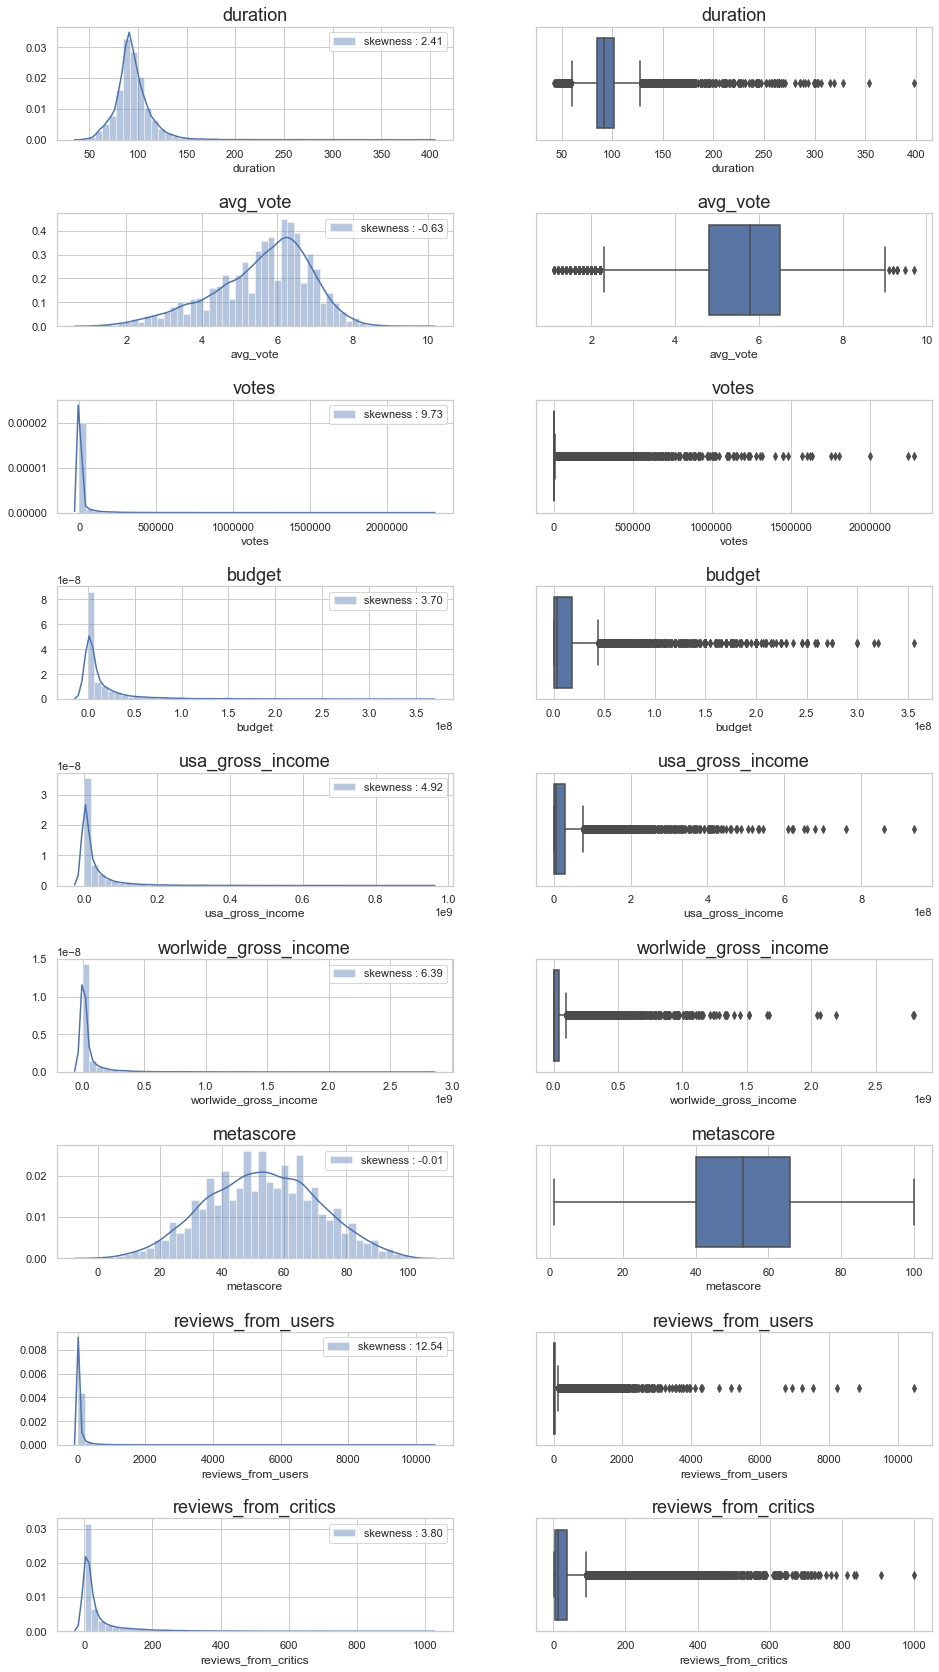

In [15]:
# Visualize distplot and boxplot on each numerical data/columns

fig, ax = plt.subplots(9, 2, figsize = (14, 24))
fig.tight_layout(pad = 5)

for i, n in enumerate(num_data):
    sns.distplot(ax = ax[i,0], a = imdb_movies[n].dropna(), label = 'skewness : %.2f'%(imdb_movies[n].skew()))
    ax[i,0].set_title(n, fontsize = 18)
    ax[i,0].legend(loc = 'best')
    
    sns.boxplot(ax = ax[i, 1], x = imdb_movies[n].dropna())
    ax[i, 1].set_title(n, fontsize = 18)
plt.show()

### Analysis Categorical Data

#### Which Decade Has Release Most Movies and Highest Average Vote (Rating)

In [16]:
# Clean the data on 'year' column
imdb_movies['year'].replace('TV Movie 2019', 2019, inplace = True)
imdb_movies['year'] = imdb_movies['year'].astype(int)

# Group the data based on Decades
movies_by_decades = imdb_movies[['imdb_title_id', 'original_title', 'year','avg_vote', 'votes']]
decades = movies_by_decades['year']//10*10
decades = decades.astype(str)+' - '+ (decades+9).astype(str)
decades_column = pd.DataFrame(decades)
movies_by_decades.insert(3, 'decades', decades_column)
movies_by_decades.head()

,imdb_title_id,original_title,year,decades,avg_vote,votes
0,tt0000009,Miss Jerry,1894,1890 - 1899,5.9,154
1,tt0002101,Cleopatra,1912,1910 - 1919,5.2,446
2,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,1910 - 1919,5.7,484
3,tt0002461,Richard III,1912,1910 - 1919,5.5,225
4,tt0003167,"Home, Sweet Home",1914,1910 - 1919,5.8,187


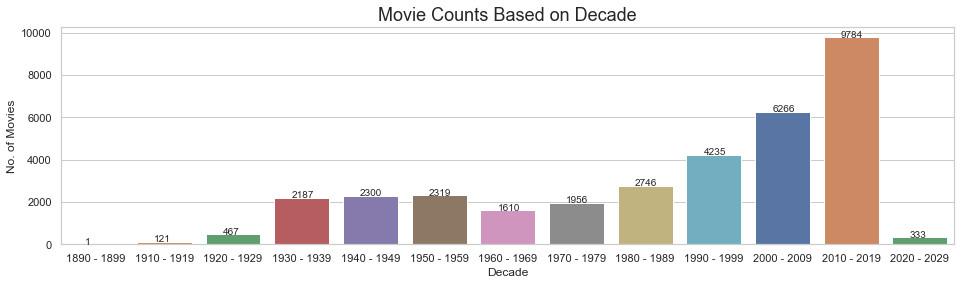

In [17]:
# Visualize movie counts release based on decade with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
decades = movies_by_decades.groupby('decades')['imdb_title_id'].count().index
count = movies_by_decades.groupby('decades')['imdb_title_id'].count()
sns.barplot(ax = ax, x = decades, y = count, palette = 'deep')
ax.set_title('Movie Counts Based on Decade', fontsize = 18)
ax.set_xlabel('Decade')
for index,count in enumerate(count.astype(int)):
       ax.text(x=index-0.15 , y =count+1 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
plt.show()

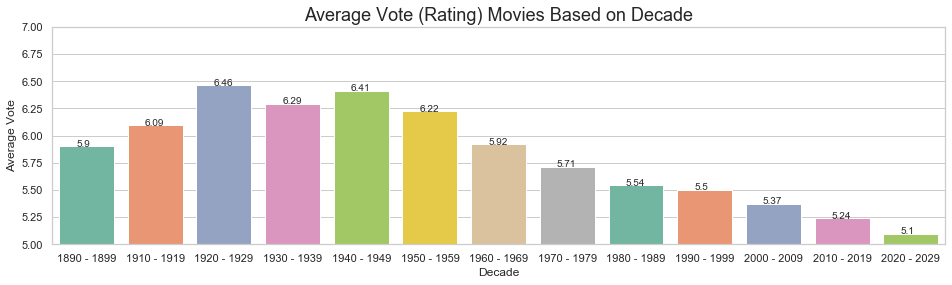

In [18]:
# Visualize average vote (rating) based on decade with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
decades = movies_by_decades.groupby('decades')['avg_vote'].mean().index
avg_vote = movies_by_decades.groupby('decades')['avg_vote'].mean()
sns.barplot(ax = ax, x = decades, y = avg_vote, palette = 'Set2')
ax.set_title('Average Vote (Rating) Movies Based on Decade', fontsize = 18)
ax.set_xlabel('Decade')
for index,avg_vote in enumerate(np.round(avg_vote, 2)):
       ax.text(x=index-0.15 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim((5, 7))

plt.show()

#### Wordcloud Genre Column


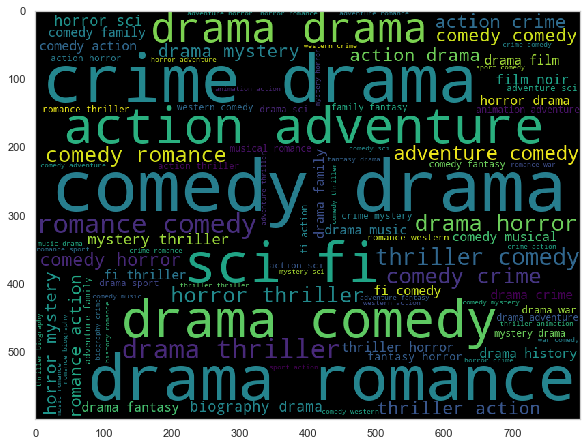

In [19]:
# Create wordcloud on genre column data

comment_words = ''
stop_words = set(STOPWORDS)

for val in imdb_movies['genre']:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 600, background_color = 'black'
                      , stopwords = stop_words, min_font_size = 10).generate(comment_words)

fig, ax = plt.subplots(figsize = (8, 6))
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
plt.show()

#### Which Genre Has Release Most Movies and Highest Average Vote (Rating)

In [20]:
# Preprocess and split genre column data (because there are more than one genre in each row data)

movies_genre = imdb_movies[['imdb_title_id', 'original_title', 'genre', 'avg_vote']]
movies_genre['genre'] = movies_genre['genre'].astype('str')

genre_split = pd.DataFrame(movies_genre['genre'].str.split(',').tolist(), index=movies_genre['imdb_title_id']).stack()
genre_split = genre_split.reset_index(['imdb_title_id'])
genre_split.columns = ['imdb_title_id', 'genre_split']
movies_genre_split = pd.merge(genre_split, movies_genre[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_genre_split['genre_split'] = movies_genre_split['genre_split'].str.lstrip(' ').str.rstrip(' ')
movies_genre_split.head()

,imdb_title_id,genre_split,original_title,avg_vote
0,tt0000009,Romance,Miss Jerry,5.9
1,tt0002101,Drama,Cleopatra,5.2
2,tt0002101,History,Cleopatra,5.2
3,tt0002199,Biography,"From the Manger to the Cross; or, Jesus of Naz...",5.7
4,tt0002199,Drama,"From the Manger to the Cross; or, Jesus of Naz...",5.7


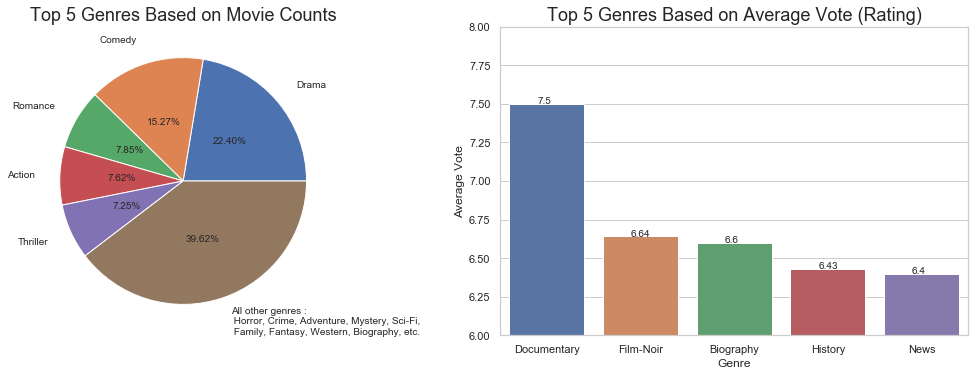

In [21]:
# Visualize top 5 genres based on movie counts and average vote (rating)

fig, ax = plt.subplots(1, 2, figsize = (16,6))
fig.tight_layout(pad = 5)

genres = movies_genre_split.groupby('genre_split')['imdb_title_id'].count().sort_values(ascending = False).index[0:5].tolist()
genres.append('All other genres : \n Horror, Crime, Adventure, Mystery, Sci-Fi, \n Family, Fantasy, Western, Biography, etc.')
count_movies = movies_genre_split.groupby('genre_split')['imdb_title_id'].count().sort_values(ascending = False)[0:5].tolist()
others_count_movies = movies_genre_split.groupby('genre_split')['imdb_title_id'].count().sort_values(ascending = False)[5:].sum()
count_movies.append(others_count_movies)
ax[0].pie(x=count_movies, autopct="%.2f%%", labels=genres, pctdistance=0.5, textprops={'fontsize': 10}, labeldistance = 1.2)
ax[0].set_title('Top 5 Genres Based on Movie Counts', fontsize = 18)

genres = movies_genre_split.groupby('genre_split')['avg_vote'].mean().sort_values(ascending = False).index[0:5]
avg_votes = movies_genre_split.groupby('genre_split')['avg_vote'].mean().sort_values(ascending = False)[0:5]
sns.barplot(ax = ax[1], x = genres, y = avg_votes)
ax[1].set_title('Top 5 Genres Based on Average Vote (Rating)', fontsize = 18)
ax[1].set_xlabel('Genre')
for index,avg_votes in enumerate(round(avg_votes, 2)):
    ax[1].text(x=index-0.1 , y =avg_votes+0 , s=f"{avg_votes}" , fontdict=dict(fontsize=10))
ax[1].set_ylabel('Average Vote')
ax[1].set_ylim(6, 8)

plt.show()

#### Which Production Company Has Release Most Movies, Highest Average Vote (Rating) and Highest Total Income

In [22]:
# Preprocess production company column data

movies_productioncomp = imdb_movies[['imdb_title_id', 'original_title', 'production_company', 'avg_vote', 'worlwide_gross_income', 'usa_gross_income']]
movies_productioncomp['total_income'] = movies_productioncomp['worlwide_gross_income'] + movies_productioncomp['usa_gross_income']
movies_productioncomp['production_company'] = movies_productioncomp['production_company'].astype('str')

gb_productioncomp = movies_productioncomp.groupby('production_company').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean'], 'total_income':['sum']})
gb_productioncomp.drop((gb_productioncomp[gb_productioncomp.index == ''].index) | (gb_productioncomp[gb_productioncomp.index == 'nan'].index), inplace = True)
gb_productioncomp.head()

,imdb_title_id,avg_vote,total_income
,count,mean,sum
production_company,,,
"""DIA"" Productions GmbH & Co. KG",1,6.1,71087024.0
"""Pempti & 12"" Tsaltabasis-Xenopoulos",1,6.0,0.0
#Sinning Works,2,4.0,0.0
'Am I Wrong?' Productions,1,4.5,0.0
.406 Production,1,6.9,21160.0


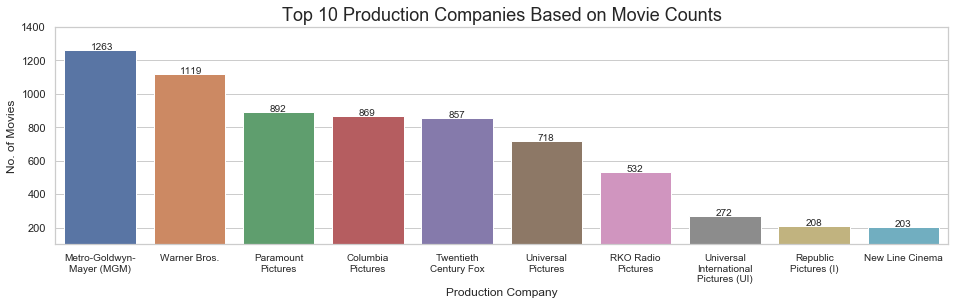

In [23]:
# Visualize top 10 production companies based on movie counts with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

productioncomp = gb_productioncomp[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_productioncomp[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = productioncomp, y = count_movies, palette = 'deep')
ax.set_title('Top 10 Production Companies Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Production Company')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.1 , y =count_movies+0.6 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(100, 1400)
plt.show()

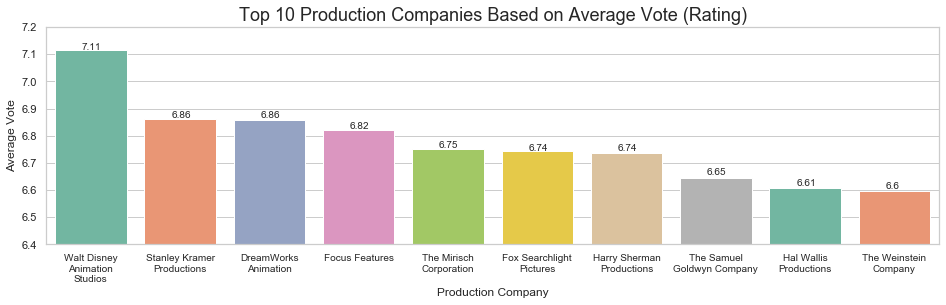

In [24]:
# Visualize top 10 production companies based on average vote (rating) with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have produce 20 movies
mask = movies_productioncomp.groupby('production_company')['imdb_title_id'].count() >= 20
productioncomp = gb_productioncomp.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_productioncomp.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = productioncomp, y = avg_vote, palette = 'Set2')
ax.set_title('Top 10 Production Companies Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Production Company')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(6.4, 7.2)
plt.show()

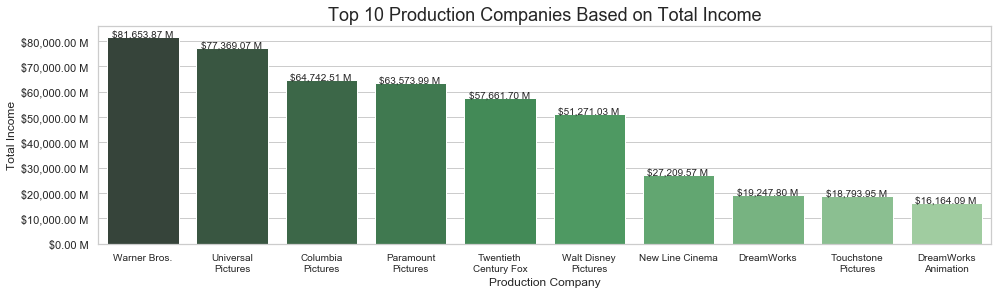

In [25]:
# Visualize top 10 production companies based on total income with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have produce 20 movies
mask = movies_productioncomp.groupby('production_company')['imdb_title_id'].count() >= 20
productioncomp = gb_productioncomp.loc[mask][('total_income',  'sum')].sort_values(ascending = False)[0:10].index
total_income = gb_productioncomp.loc[mask][('total_income',  'sum')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = productioncomp, y = total_income, palette = 'Greens_d')
ax.set_title('Top 10 Production Companies Based on Total Income', fontsize = 18)
ax.set_xlabel('Production Company')

ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,total_income in enumerate(round(total_income, 2)):
    ax.text(x=index-0.35 , y =total_income+1 , s=f"{'$'+ '{:,.2f}'.format(total_income/1000000) + ' M'}" 
            , fontdict=dict(fontsize=10))
ax.set_ylabel('Total Income')
ax.set_yticklabels(['$'+ '{:,.2f}'.format(x) + ' M' for x in ax.get_yticks()/1000000])

plt.show()

#### Which Director Has Release Most Movies and Highest Average Vote (Rating)

In [26]:
# Preprocess and split director column data (because there are more than one director in each row data)

movies_director = imdb_movies[['imdb_title_id', 'original_title', 'director', 'avg_vote']]
movies_director['director'] = movies_director['director'].astype('str')

director_split = pd.DataFrame(movies_director['director'].str.split(',').tolist(), index=movies_director['imdb_title_id']).stack()
director_split = director_split.reset_index(['imdb_title_id'])
director_split.columns = ['imdb_title_id', 'director_split']
movies_director_split = pd.merge(director_split, movies_director[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_director_split['director_split'] = movies_director_split['director_split'].str.lstrip(' ').str.rstrip(' ')
gb_director = movies_director_split.groupby('director_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_director.drop(gb_director[gb_director.index == 'nan'].index, inplace = True)
gb_director.head()

,imdb_title_id,avg_vote
,count,mean
director_split,,
'Evil' Ted Smith,1,4.000
'Philthy' Phil Phillips,1,3.700
A. Blaine Miller,1,5.300
A. Dean Bell,2,4.650
A. Edward Sutherland,25,6.328


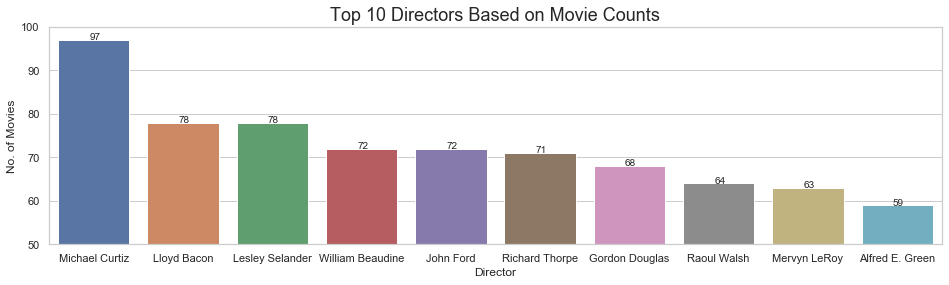

In [27]:
# Visualize top 10 directors based on movie counts with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
directors = gb_director[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_director[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]
sns.barplot(ax = ax, x = directors, y = count_movies, palette = 'deep')
ax.set_title('Top 10 Directors Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Director')
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.05 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(50, 100)
plt.show()

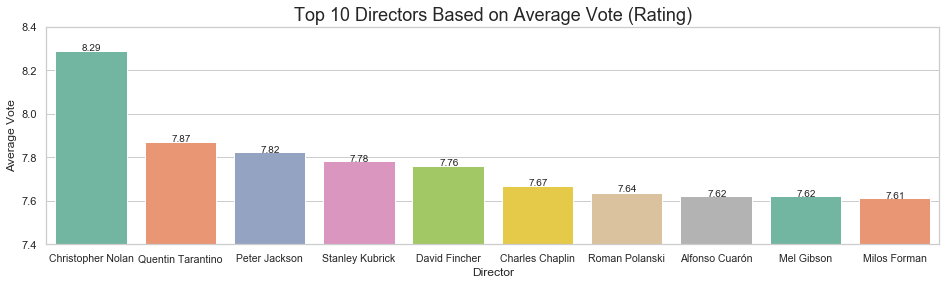

In [28]:
# Visualize top 10 directors based on average vote (rating) with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have direct 5 movies
mask = movies_director_split.groupby('director_split')['imdb_title_id'].count() >= 5
directors = gb_director.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_director.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = directors, y = avg_vote, palette = 'Set2')
ax.set_title('Top 10 Directors Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Director')
ax.set_xticklabels(directors,fontsize = 10.5)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(7.4, 8.4)
plt.show()

#### Which Writer Has Release Most Movies and Highest Average Vote (Rating)

In [29]:
# Preprocess and split writer column data (because there are more than one writer in each row data)

movies_writer = imdb_movies[['imdb_title_id', 'original_title', 'writer', 'avg_vote']]
movies_writer['writer'] = movies_writer['writer'].astype('str')

writer_split = pd.DataFrame(movies_writer['writer'].str.split(',').tolist(), index=movies_writer['imdb_title_id']).stack()
writer_split = writer_split.reset_index(['imdb_title_id'])
writer_split.columns = ['imdb_title_id', 'writer_split']
movies_writer_split = pd.merge(writer_split, movies_writer[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_writer_split['writer_split'] = movies_writer_split['writer_split'].str.lstrip(' ').str.rstrip(' ')
gb_writer = movies_writer_split.groupby('writer_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_writer.drop(gb_writer[gb_writer.index == 'nan'].index, inplace = True)
gb_writer.head()

,imdb_title_id,avg_vote
,count,mean
writer_split,,
'A.J.' Marriot,1,7.2
'Evil' Ted Smith,1,4.0
'Weird Al' Yankovic,1,7.0
50 Cent,2,4.6
A. Channing Edington,1,5.7


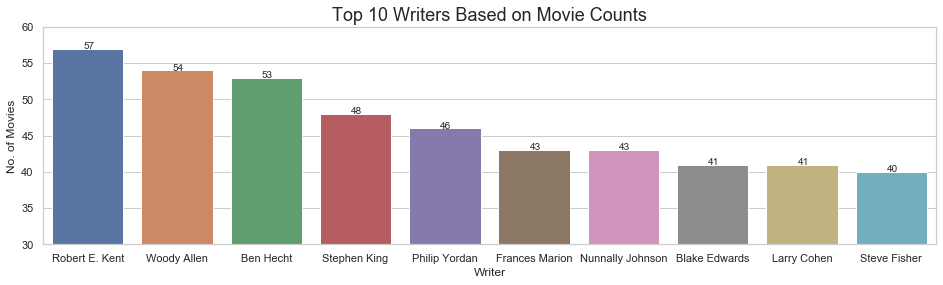

In [30]:
# Visualize top 10 writers based on movie counts with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

writers = gb_writer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_writer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = writers, y = count_movies, palette = 'deep')
ax.set_title('Top 10 Writers Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Writer')
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.05 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(30, 60)
plt.show()

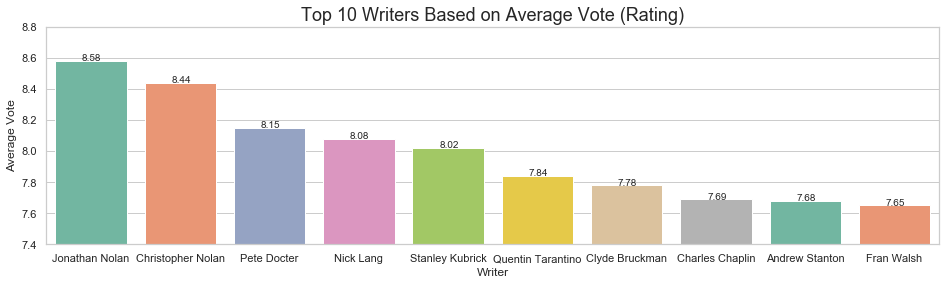

In [31]:
# Visualize top 10 writers based on average vote (rating) with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have write 5 movies
mask = movies_writer_split.groupby('writer_split')['imdb_title_id'].count() >= 5
writers = gb_writer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_writer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = writers, y = avg_vote, palette = 'Set2')
ax.set_title('Top 10 Writers Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Writer')
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(7.4, 8.8)
plt.show()

#### Which Actor or Actress Has Release Most Movies and Highest Average Vote (Rating)

In [32]:
# Preprocess and split actor column data (because there are more than one actor in each row data)

movies_actor = imdb_movies[['imdb_title_id', 'original_title', 'actors', 'avg_vote']]
movies_actor['actors'] = movies_actor['actors'].astype('str')

actor_split = pd.DataFrame(movies_actor['actors'].str.split(',').tolist(), index=movies_actor['imdb_title_id']).stack()
actor_split = actor_split.reset_index(['imdb_title_id'])
actor_split.columns = ['imdb_title_id', 'actor_split']
movies_actor_split = pd.merge(actor_split, movies_actor[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_actor_split['actor_split'] = movies_actor_split['actor_split'].str.lstrip(' ').str.rstrip(' ')
gb_actor = movies_actor_split.groupby('actor_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_actor.drop((gb_actor[gb_actor.index == 'nan'].index), inplace = True)
gb_actor.head()

,imdb_title_id,avg_vote
,count,mean
actor_split,,
'Baby' Carmen De Rue,3,5.166667
'Big Al' Solomon,1,3.400000
'Big Jack' Provan,1,6.000000
'Big Walter' Price,1,5.800000
'Big' Jack Little,1,4.300000


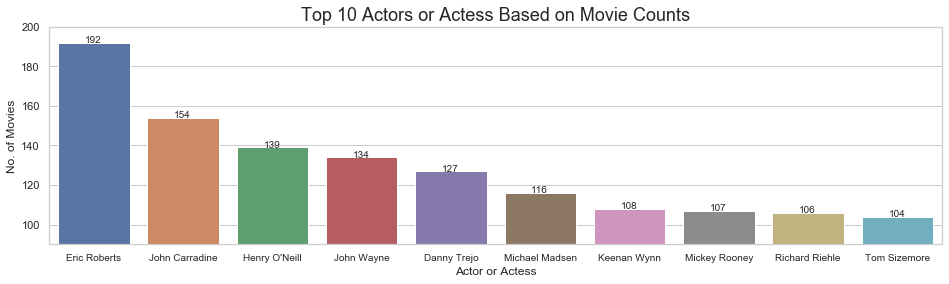

In [33]:
# Visualize top 10 actors or actress based on movie counts with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

actor = gb_actor[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_actor[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = actor, y = count_movies, palette = 'deep')
ax.set_title('Top 10 Actors or Actess Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Actor or Actess')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.1 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(90, 200)
plt.show()

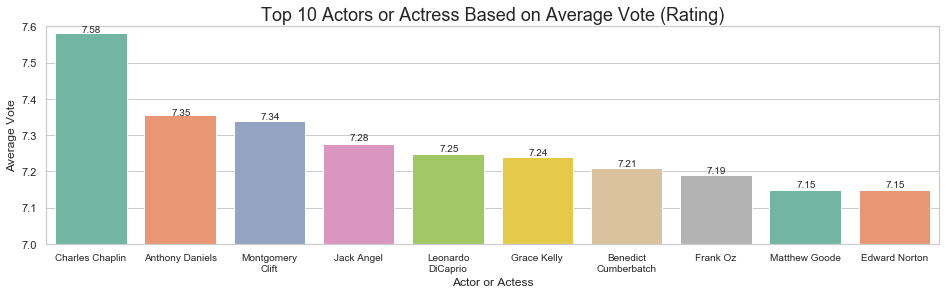

In [34]:
# Visualize top 10 actors or actress based on average vote (rating) with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have become an actor/actress on 10 movies
mask = movies_actor_split.groupby('actor_split')['imdb_title_id'].count() >= 10
actor = gb_actor.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_actor.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = actor, y = avg_vote, palette = 'Set2')
ax.set_title('Top 10 Actors or Actress Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Actor or Actess')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(7, 7.6)
plt.show()

#### Which Cinematographer Has Release Most Movies and Highest Average Vote (Rating)

In [35]:
# Preprocess and split cinematographer column data (because there are more than one cinematographer in each row data)

movies_cinematographer = imdb_movies[['imdb_title_id', 'original_title', 'cinematographer', 'avg_vote']]
movies_cinematographer['cinematographer'] = movies_cinematographer['cinematographer'].astype('str')

cinematographer_split = pd.DataFrame(movies_cinematographer['cinematographer'].str.split(',').tolist(), index=movies_cinematographer['imdb_title_id']).stack()
cinematographer_split = cinematographer_split.reset_index(['imdb_title_id'])
cinematographer_split.columns = ['imdb_title_id', 'cinematographer_split']

movies_cinematographer_split = pd.merge(cinematographer_split, movies_cinematographer[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_cinematographer_split['cinematographer_split'] = movies_cinematographer_split['cinematographer_split'].str.lstrip(' ').str.rstrip(' ')
gb_cinematographer = movies_cinematographer_split.groupby('cinematographer_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_cinematographer.drop((gb_cinematographer[gb_cinematographer.index == 'nan'].index), inplace = True)
gb_cinematographer.head()

,imdb_title_id,avg_vote
,count,mean
cinematographer_split,,
A. Todd Smith,1,5.80
A. Troy Thomas,1,6.70
A.J. Fitzpatrick,1,3.40
A.J. Raitano,5,5.14
A.K. Rosencrans,1,4.10


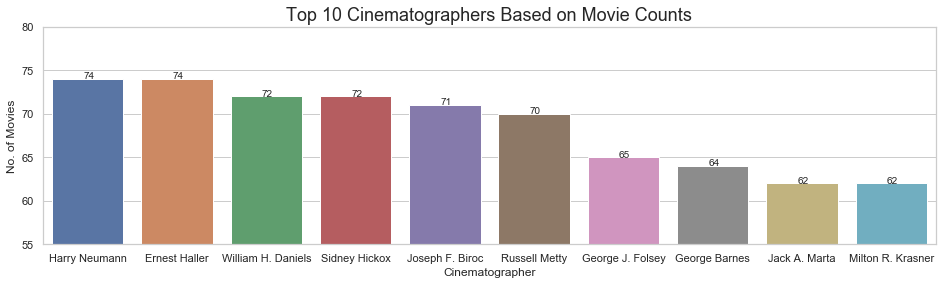

In [36]:
# Visualize top 10 cinematographers based on movie counts with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

cinematographer = gb_cinematographer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_cinematographer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = cinematographer, y = count_movies, palette = 'deep')
ax.set_title('Top 10 Cinematographers Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Cinematographer')
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.05 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(55, 80)
plt.show()

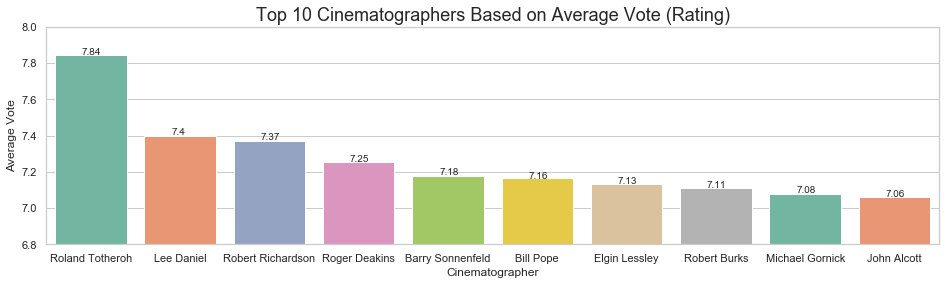

In [37]:
# Visualize top 10 cinematographers based on average vote (rating) with barplot

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have direct 5 movies
mask = movies_cinematographer_split.groupby('cinematographer_split')['imdb_title_id'].count() >= 5
cinematographer = gb_cinematographer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_cinematographer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = cinematographer, y = avg_vote, palette = 'Set2')
ax.set_title('Top 10 Cinematographers Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Cinematographer')
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(6.8, 8)
plt.show()

# Recommender System Based on Content

In [38]:
# Features that used in this recommender system is 'original_title' (as index),  'genre', 'director', 'actors', 'description'
data_recsys=imdb_movies[['original_title', 'genre', 'director', 'actors', 'description']].reset_index(drop = True)
data_recsys.head()

,original_title,genre,director,actors,description
0,Miss Jerry,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.
1,Cleopatra,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...
2,"From the Manger to the Cross; or, Jesus of Naz...","Biography, Drama",Sidney Olcott,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ..."
3,Richard III,Drama,"André Calmettes, James Keane","Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...
4,"Home, Sweet Home",Drama,D.W. Griffith,"Henry B. Walthall, Josephine Crowell, Lillian ...",John Howard Payne at his most miserable point ...


In [39]:
# Preprocess the data

data_recsys.set_index('original_title', inplace = True)

data_recsys['genre'] = data_recsys['genre'].fillna('').astype('str').str.lower()
data_recsys['genre'] = data_recsys['genre'].str.split(',')

data_recsys['director'] = data_recsys['director'].fillna('').astype('str').str.lower()
data_recsys['director'] = data_recsys['director'].str.split(',')

data_recsys['actors'] = data_recsys['actors'].fillna('').astype('str').str.lower()
data_recsys['actors'] = data_recsys['actors'].str.split(',')

In [40]:
# Preprocess description column data

data_recsys['description'] = data_recsys['description'].fillna('').astype('str').str.lower()
data_recsys['description'] = data_recsys['description'].str.translate(str.maketrans('', '', string.punctuation))

listStopwords = set(stopwords.words('english'))
filtered = []
ps = PorterStemmer() 
for i, text in enumerate(data_recsys['description'].str.split()):
    for word in text:
        # Filtering/Removing stopwords in the text
        if word not in listStopwords:
            # Stemming words
            word_stemmed = ps.stem(word)
            filtered.append(word_stemmed)
    data_recsys['description'][i] = filtered
    filtered = []

In [41]:
# Create new column 'bunch_of_words' that contains words taken from all features columns

data_recsys['bunch_of_words'] = ''
for i, text in data_recsys.iterrows():
    words = ''
    for col in data_recsys.columns:
        words = words + ' '.join(text[col]) + ' '
    data_recsys['bunch_of_words'][i] = words

In [42]:
data_recsys

,genre,director,actors,description,bunch_of_words
original_title,,,,,
Miss Jerry,[romance],[alexander black],"[blanche bayliss, william courtenay, chaunce...","[adventur, femal, report, 1890]",romance alexander black blanche bayliss willi...
Cleopatra,"[drama, history]",[charles l. gaskill],"[helen gardner, pearl sindelar, miss fieldin...","[fabl, queen, egypt, affair, roman, gener, mar...",biography drama history joseph l. mankiewicz...
"From the Manger to the Cross; or, Jesus of Nazareth","[biography, drama]",[sidney olcott],"[r. henderson bland, percy dyer, gene gaunti...","[account, life, jesu, christ, base, book, new,...",biography drama sidney olcott r. henderson bl...
Richard III,[drama],"[andré calmettes, james keane]","[robert gemp, frederick warde, albert gardne...","[richard, gloucest, use, manipul, murder, gain...",drama andré calmettes james keane robert gemp...
"Home, Sweet Home",[drama],[d.w. griffith],"[henry b. walthall, josephine crowell, lilli...","[john, howard, payn, miser, point, life, write...",drama d.w. griffith henry b. walthall josephi...
...,...,...,...,...,...
Bulletproof 2,"[action, comedy]",[don michael paul],"[faizon love, kirk fox, tony todd, cassie c...","[set, 25, year, jack, work, special, agent, mi...",action comedy don michael paul faizon love k...
Mogul Mowgli,[drama],[bassam tariq],"[riz ahmed, aiysha hart, kiran sonia sawar, ...","[british, pakistani, rapper, cusp, first, worl...",drama bassam tariq riz ahmed aiysha hart kir...
VFW,"[action, crime, horror]",[joe begos],"[stephen lang, william sadler, fred williams...","[group, old, war, veteran, put, live, line, de...",action crime horror joe begos stephen lang ...


In [43]:
# Convert a collection of text documents to a vector of term/token counts (CountVectorizer)

count = CountVectorizer()
count_matrix = count.fit_transform(data_recsys['bunch_of_words']).astype(np.uint8)

In [44]:
# Calculate Cosine Similarity
# Cosine similarity is a metric used to measure how similar the documents are irrespective of their size

chunk_size = 500 
matrix_len = count_matrix.shape[0]

# Calculate cosine similarity chunk by chunk
def similarity_cosine_by_chunk(start, end):
    if end > matrix_len:
        end = matrix_len
    return cosine_similarity(X=count_matrix[start:end], Y=count_matrix)

cosine_similarity_all = []

# Merge/join all chunks (chunk by chunk)
for chunk_start in range(0, matrix_len, chunk_size):
    cosine_similarity_chunk= similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
    cosine_similarity_all.append(cosine_similarity_chunk)

In [45]:
# Extract and concatenate all chunks
cosine_sim=np.concatenate(([cosine_similarity_all[i] for i in range(0, len( cosine_similarity_all))]))
del cosine_similarity_all # to reduce memory usage

In [46]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.03388371, 0.        ,
        0.03413944],
       [0.        , 1.        , 0.09035079, ..., 0.05235833, 0.05579525,
        0.035169  ],
       [0.        , 0.09035079, 1.        , ..., 0.01931669, 0.02058467,
        0.01946247],
       ...,
       [0.03388371, 0.05235833, 0.01931669, ..., 1.        , 0.03181021,
        0.0751901 ],
       [0.        , 0.05579525, 0.02058467, ..., 0.03181021, 1.        ,
        0.03205029],
       [0.03413944, 0.035169  , 0.01946247, ..., 0.0751901 , 0.03205029,
        1.        ]])

In [47]:
# Create function that return 10 recommended/similar movies based on input

# Create variable index
index_movies = pd.Series(data_recsys.index)

# Movies Recommendation function
def recommendation_movies(title, cosine_sim = cosine_sim):
    recommended_movies = []
    index_movie_input = index_movies[index_movies == title].index[0]
    score_movies = pd.Series(cosine_sim[index_movie_input]).sort_values(ascending = False)
    top_10_index_movies = list(score_movies.iloc[1:11].index)
    # Get movies title and year by index (top 10 movies)
    for i in top_10_index_movies:
        recommended_movies.append(imdb_movies['original_title'].iloc[i] + ' (' + str(imdb_movies['year'].iloc[i]) + ')')
    return recommended_movies

In [48]:
# Results
recommendation_movies('The Dark Knight')

['Batman Begins (2005)',
 'The Dark Knight Rises (2012)',
 'Batman Returns (1992)',
 "Logan's Run (1976)",
 'Law Abiding Citizen (2009)',
 "Hitman's Run (1999)",
 'Diverted Eden (2020)',
 'Hamburger Hill (1987)',
 'Alexander (2004)',
 'The Prestige (2006)']